In [1]:
import matplotlib.pylab as plt
import numpy as np
import math
import statistics
import timeit
import random
%matplotlib inline

### Demo

In [2]:
def demo(n):
    accum = 0
    for i in range(n):
        accum += 1
    return accum

In [227]:
# global lst
# lst = []
# for i in range(0, 1000, 5):
  
#   [timeit.timeit('sum(r)',
#                 setup='lst.append({})'.format(i),
#                 number=1000),
#                 globals=globals(),
#   for n in range(1000, 10_000, 1000)]

### Exercise 1

In [4]:
def f1(lst):
    r = 0
    n = 100
    if len(lst) < n:
        n = len(lst)
    for x in range(n):
        r += x

In [5]:
lst = []
ts = []
ns = []

s = '''
lst = []
def func_call(lst=lst):
  for i in range(0, 1000, 5):
    lst.append(i)

    '''
ts.append([timeit.timeit('f1({})'.format(lst),
               setup=s,
               number=1000,
               globals=globals())
              for n in range(0, 1000, 5)])

a = np.squeeze(ts)

ts = a.tolist()

for i in range(0, 200, 1):
  ns.append(i)

In [6]:
# lst = []
# ts_list = []
# ns = []
# for i in range(0, 1000, 5):
#   lst.append(i)
#   ns.append(i)
# #  ns = np.linspace(1, 10_000, 400, dtype=int)
  
  # ts_list.append([timeit.timeit('f1({})'.format(lst), 
  #                   number=5000, 
  #                   globals=globals())])
        #for n in lst]  

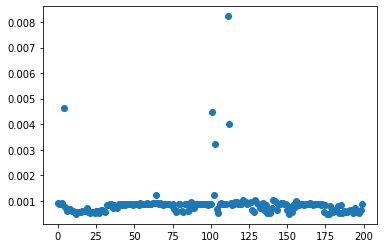

In [7]:
plt.scatter(ns,ts);

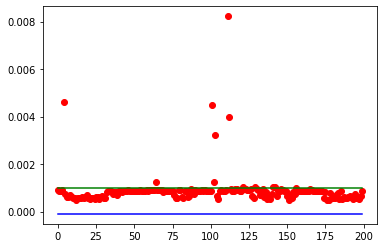

In [8]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [.001]*len(ns), '-g')
plt.plot(ns, [-.0001]*len(ns), '-b');

### Exercise 2


In [171]:
def f2(x):
    r = x / 2
    d = 1e-10
    while abs(x - r**2) > d:
        r = (r + x/r) / 2
    return r

In [ ]:
# collect timing data into arrays/lists here
ts = []
ns = []

ts.append([timeit.timeit('f2({})'.format(n),
               number=10000,
               globals=globals())
              for n in range(0, 3000, 5)])

_ = np.squeeze(ts)

ts = _.tolist()

for i in range(0, 3000, 5):
  ns.append(i)

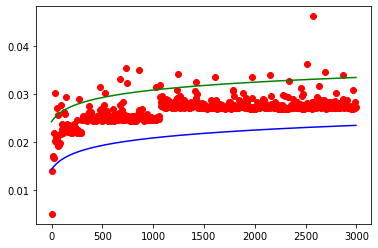

In [ ]:
xs = np.linspace(0.1, 4, 600)
ys_log = [.0025*math.log(1*x) + .03 for x in xs] # Upper bound 
ys_log2 = [.0025*math.log(1*x) + .02 for x in xs] # Lower bounds


plt.plot(ns, ts, 'or');

plt.plot(ns, ys_log, '-g');
plt.plot(ns, ys_log2, '-b');

### Exercise 3

In [9]:
def f3(lst):
    while True:
        swapped = False
        for i in range(len(lst)-1):
            if lst[i] > lst[i+1]:
                lst[i], lst[i+1] = lst[i+1], lst[i]
                swapped = True
        if not swapped:
            break

In [179]:
ns = np.linspace(0, 1000, 100, dtype=int)

ts3 = [timeit.timeit('f3(lst)',
                     setup='lst=list((range({})))'.format(n),
                     globals=globals(),
                     number=1)
       for n in ns]

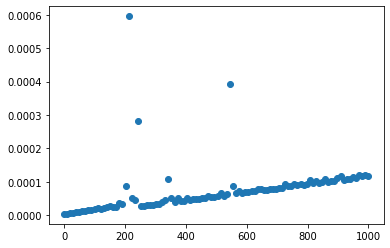

In [180]:
plt.scatter(ns, ts3);

In [182]:
ns = []
ts = []
lst = []

for i in range(500, 0, -1):
  lst.append(i)
  start_time = timeit.default_timer()
  f3(lst)
  end_time = timeit.default_timer()
  ts.append(end_time-start_time)
  ns.append(len(lst))

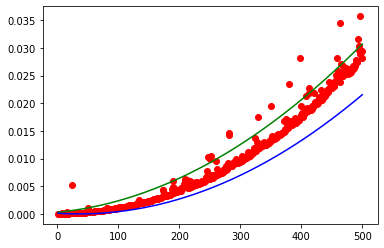

In [217]:
count = 100
xs = np.linspace(0.1, 4, count)
ys_quadratic = [.001*x**2 for x in xs] #upper bounds
ys_quadratic_2 = [x**2 for x in xs] #lower bounds

plt.plot(ns, ts, 'or');
plt.plot(ns, [(.0000001)*(n+55)**2 for n in range(0,len(lst))], '-g');
plt.plot(ns, [(.0000001)*(n-35)**2 for n in range(0,len(lst))], '-b');

###Exercise 4

In [228]:
def f4(n):
    counters = [0] * n
    while not all(counters):
        for i in range(n):
            if counters[i]:
                counters[i] = 0
            else:
                counters[i] = 1
                break

In [240]:
ts = []
ns = []
for i in range(0, 25):
  start_time = timeit.default_timer()
  f4(i)
  end_time = timeit.default_timer()
  ts.append(end_time-start_time)
  ns.append(i)

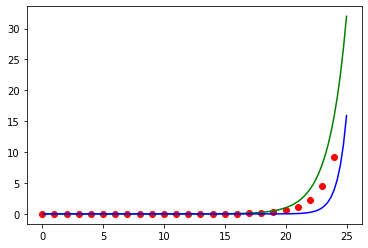

In [247]:

count = 100
xs = np.linspace(0.1, 25, count)
ys_exp = [2**(1*x-20) for x in xs]
ys_exp2 = [3.99**(1*x-23) for x in xs]

plt.plot(ns, ts, 'or');
plt.plot(xs, ys_exp, '-g'); #upper
plt.plot(xs,ys_exp2, '-b'); #lower

###Exercise 5

In [248]:
def f5(lst):
    n = len(lst)
    for i in range(n*100):
        a = random.randrange(n)
        b = random.randrange(n)
        lst[a], lst[b] = lst[b], lst[a]

In [262]:
lst = []
ts = []
ns = []
for i in range(0, 1000, 5):
  lst.append(i)
  start_time = timeit.default_timer()
  f5(lst)
  end_time = timeit.default_timer()
  ts.append(end_time - start_time)
  ns.append(len(lst))


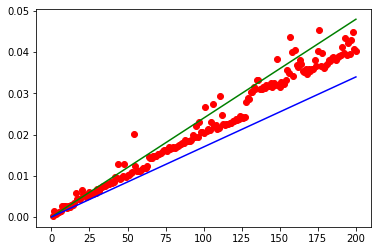

In [269]:
count = 100
xs = np.linspace(0.1, 200, count)
ys_linear = [(.00024*x) for x in xs]
ys_linear2=[(.00017*x) for x in xs]

plt.plot(ns, ts, 'or');
plt.plot(xs, ys_linear, '-g'); #upper bounds
plt.plot(xs, ys_linear2, '-b'); #lower bounds